# Machine Learning & Regression Analysis

### This script contains the following points:
1. Importing libraries and modules
2. Importing data
3. Cleaning data
4. Exploring data via scatterplot
5. Forming a hypothesis
6. Reshaping the X and y variables into NumPy arrays
7. Splitting the data into training and test sets
8. Run a linear regression on the data
9. Create a scatterplot that shows regression on the test set
10. Interpretation of how regression line fits data
11. Check model performance statistics
12. Compare the predicted y values with the actual y values
13. Thoughts on how well model performed on test set


### 1. Importing libraries and modules

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
%matplotlib inline

### 2. Importing data

In [4]:
path = r'C:\Users\keely\Documents\Courses\CareerFoundry\Immersion\Achievement 6 - Advanced Analytics_Dashboard\2019-2021 CDC Natality'

In [5]:
# Import latest natality dataframe.

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_flags.pkl'))

In [6]:
df.head()

,index,state,year,month,month_code,mother_ed,prenatal_start,births,birth_wt_avg,mother_age_avg,gest_age_avg,date,season,region,birth_wt_alert,gest_age_alert,mother_age_range,birth_wt_cat,gest_age_cat
0,0,Alabama,2019,January,1,high school GED or less,10,34,3223.149902,27.440001,38.820000,2019-01-01,Winter,South,NBW,not preterm,26-28,average,old
1,1,Alabama,2019,January,1,high school GED or less,2,30,3482.770020,29.930000,39.070000,2019-01-01,Winter,South,NBW,not preterm,28-30,highest,oldest
2,2,Alabama,2019,January,1,high school GED or less,3,25,3251.959961,30.760000,38.639999,2019-01-01,Winter,South,NBW,not preterm,30-32,average,old
3,3,Alabama,2019,January,1,high school GED or less,4,25,3120.399902,28.639999,38.119999,2019-01-01,Winter,South,NBW,not preterm,28-30,low,young
4,4,Alabama,2019,January,1,high school GED or less,5,12,2938.080078,27.920000,37.500000,2019-01-01,Winter,South,NBW,not preterm,26-28,lowest,youngest


In [7]:
df.columns

Index(['index', 'state', 'year', 'month', 'month_code', 'mother_ed',
       'prenatal_start', 'births', 'birth_wt_avg', 'mother_age_avg',
       'gest_age_avg', 'date', 'season', 'region', 'birth_wt_alert',
       'gest_age_alert', 'mother_age_range', 'birth_wt_cat', 'gest_age_cat'],
      dtype='object')

In [8]:
df.shape

(86437, 19)

### 3. Cleaning data

In [9]:
# Checking for missing values:

df.isnull().sum()

# No missing values.

index               0
state               0
year                0
month               0
month_code          0
mother_ed           0
prenatal_start      0
births              0
birth_wt_avg        0
mother_age_avg      0
gest_age_avg        0
date                0
season              0
region              0
birth_wt_alert      0
gest_age_alert      0
mother_age_range    0
birth_wt_cat        0
gest_age_cat        0
dtype: int64

In [10]:
# Duplicates check:

dups = df.duplicated()
dups.shape

(86437,)

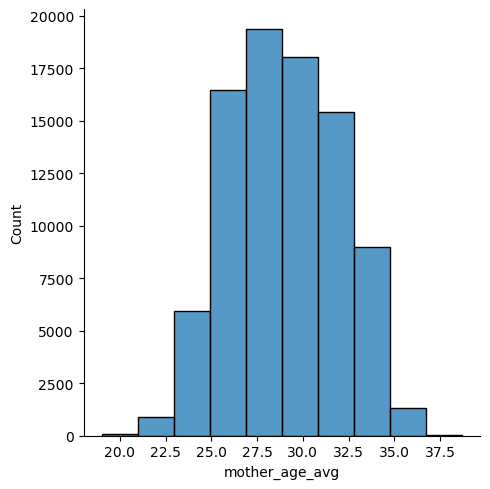

In [11]:
sns.displot(df['mother_age_avg'], bins=10) # Shows extreme values


In [12]:
df_mom = df[df['mother_age_avg']>37]


In [13]:
df_mom["mother_age_avg"].value_counts(dropna = False)

37.180000    3
37.099998    3
37.400002    2
37.860001    1
37.070000    1
37.080002    1
37.349998    1
37.540001    1
38.119999    1
37.200001    1
37.549999    1
37.330002    1
37.130001    1
37.250000    1
37.820000    1
38.700001    1
37.580002    1
37.700001    1
37.900002    1
37.380001    1
37.910000    1
37.270000    1
38.130001    1
37.299999    1
Name: mother_age_avg, dtype: int64

In [14]:
df_mom.head(10)

# 29 records where the average mother age is greater than 37 years of age seems resonable. All these women had
# master's degrees or Ph.D./professional degrees.

,index,state,year,month,month_code,mother_ed,prenatal_start,births,birth_wt_avg,mother_age_avg,gest_age_avg,date,season,region,birth_wt_alert,gest_age_alert,mother_age_range,birth_wt_cat,gest_age_cat
2410,2410,California,2019,March,3,doctorate or professional degree,2,14,3172.709961,37.860001,38.849998,2019-03-01,Spring,West,NBW,not preterm,> 32,low,old
3770,3770,Colorado,2019,October,10,doctorate or professional degree,4,12,2924.750000,37.250000,37.750000,2019-10-01,Fall,West,NBW,not preterm,> 32,lowest,youngest
3874,3874,Colorado,2019,December,12,master's degree,5,15,3162.530029,38.130001,37.799999,2019-12-01,Winter,West,NBW,not preterm,> 32,low,youngest
6803,6803,Hawaii,2019,May,5,master's degree,4,11,2938.000000,37.270000,38.360001,2019-05-01,Spring,West,NBW,not preterm,> 32,lowest,young
8283,8283,Indiana,2019,January,1,master's degree,5,11,3015.000000,37.180000,37.549999,2019-01-01,Winter,Midwest,NBW,not preterm,> 32,lowest,youngest
12744,12744,Massachusetts,2019,December,12,doctorate or professional degree,1,11,3504.729980,37.910000,39.910000,2019-12-01,Winter,Northeast,NBW,not preterm,> 32,highest,oldest
17178,17178,New Jersey,2019,June,6,master's degree,7,13,2964.620117,37.380001,37.919998,2019-06-01,Summer,Northeast,NBW,not preterm,> 32,lowest,youngest
27681,27681,Washington,2019,May,5,doctorate or professional degree,4,10,2836.500000,37.900002,37.099998,2019-05-01,Spring,West,NBW,not preterm,> 32,lowest,youngest
31844,2553,California,2020,May,5,doctorate or professional degree,3,10,3032.899902,37.700001,37.900002,2020-05-01,Spring,West,NBW,not preterm,> 32,lowest,youngest
32180,2889,California,2020,September,9,doctorate or professional degree,2,12,2919.580078,37.580002,37.169998,2020-09-01,Fall,West,NBW,not preterm,> 32,lowest,youngest


In [15]:
df['mother_age_avg'].mean() # Check the mean

29.00535011291504

In [16]:
df['mother_age_avg'].median() # Check the median

28.899999618530273

In [17]:
df['mother_age_avg'].max() # Check the max

38.70000076293945

<AxesSubplot:xlabel='birth_wt_avg', ylabel='Count'>

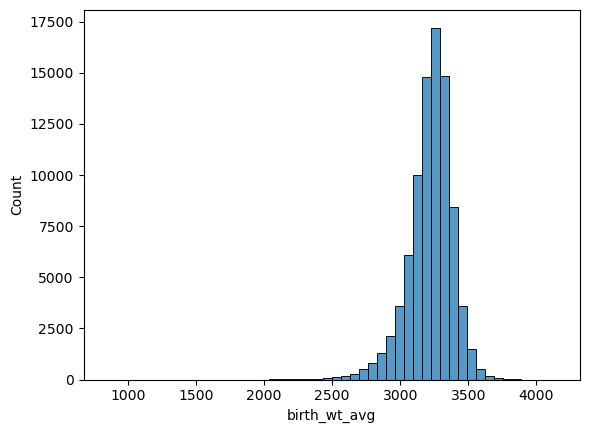

In [18]:
sns.histplot(df['birth_wt_avg'], bins=50) # Shows extreme values for birth weight averages.

In [19]:
df_birthwt = df[df['birth_wt_avg']>4000]
df_birthwt

,index,state,year,month,month_code,mother_ed,prenatal_start,births,birth_wt_avg,mother_age_avg,gest_age_avg,date,season,region,birth_wt_alert,gest_age_alert,mother_age_range,birth_wt_cat,gest_age_cat
70138,12356,Massachusetts,2021,November,11,associate degree or some college,4,22,4152.5,28.450001,39.5,2021-11-01,Fall,Northeast,HBW,not preterm,28-30,highest,oldest


In [20]:
df_birthwt["birth_wt_avg"].value_counts(dropna = False)

4152.5    1
Name: birth_wt_avg, dtype: int64

In [21]:
df['birth_wt_avg'].mean() # Check the mean

3219.15185546875

In [22]:
df['birth_wt_avg'].median() # Check the median

3237.469970703125

In [23]:
df['birth_wt_avg'].max() # Check the max

4152.5

#### Averages and maximums are within expected ranges.

### 4. Exploring data via scatterplot

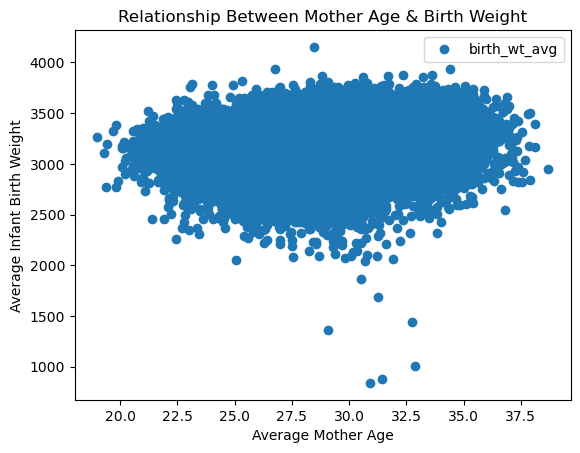

In [25]:
corr_age_birthwt = df.plot(x = 'mother_age_avg', y='birth_wt_avg',style='o') 
plt.title('Relationship Between Mother Age & Birth Weight')  
plt.xlabel('Average Mother Age')  
plt.ylabel('Average Infant Birth Weight')  
plt.show()

In [26]:
corr_age_birthwt.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'corr_age_birthwt_6.4.png'), bbox_inches='tight')

### 5. Forming a Hypothesis

#### If a woman giving birth is older, then she has a higher risk of giving birth to an infant who has a birth weight that is larger for its gestational age than a woman who is younger. Also, if a woman giving birth is younger, then she also has a somewhat greater risk of having a lower birth weight infant than older women, with women in their 30s having the greatest risk delivering infants of low birth weights.

In [28]:
df_sub = df[['state','year','month','prenatal_start','birth_wt_avg','mother_age_avg','date']]

In [29]:
df_sub.head()

,state,year,month,prenatal_start,birth_wt_avg,mother_age_avg,date
0,Alabama,2019,January,10,3223.149902,27.440001,2019-01-01
1,Alabama,2019,January,2,3482.770020,29.930000,2019-01-01
2,Alabama,2019,January,3,3251.959961,30.760000,2019-01-01
3,Alabama,2019,January,4,3120.399902,28.639999,2019-01-01
4,Alabama,2019,January,5,2938.080078,27.920000,2019-01-01


### 6. Reshaping the X and y variables into NumPy arrays

In [30]:
# The scikit-learn library is programmed to take NumPy arrays. Reshape the variables into NumPy arrays and put them 
# into separate objects.

X = df_sub['mother_age_avg'].values.reshape(-1,1)
y = df_sub['birth_wt_avg'].values.reshape(-1,1)

In [31]:
X

array([[27.44],
       [29.93],
       [30.76],
       ...,
       [34.73],
       [32.68],
       [33.33]], dtype=float32)

In [32]:
y

array([[3223.15],
       [3482.77],
       [3251.96],
       ...,
       [3488.64],
       [3173.05],
       [3091.07]], dtype=float32)

### 7. Splitting the data into training and test sets

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 8. Run a linear regression on the data


In [34]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [35]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [36]:
# Create a prediction for y on the test set.

y_predicted = regression.predict(X_test)

### 9. Create a scatterplot that shows regression on the test set

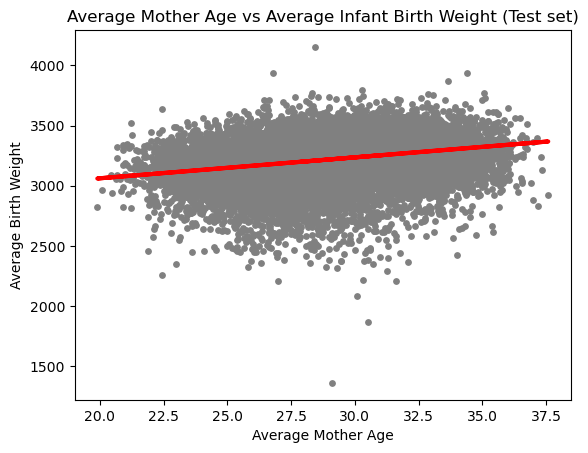

In [45]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Average Mother Age vs Average Infant Birth Weight (Test set)')
plot_test.xlabel('Average Mother Age')
plot_test.ylabel('Average Birth Weight')
plot_test.show()

corr_age_birthwt = df.plot(x = 'mother_age_avg', y='birth_wt_avg',style='o') 
plt.title('Relationship Between Mother Age & Birth Weight')  
plt.xlabel('Average Mother Age')  
plt.ylabel('Average Infant Birth Weight')  
plt.show()

### 10. Intrepretation of how regression line fits data

#### There does appear to be some relationship between mother age and infant birth weight, but there is some variation. If the relationship is linear, further steps will indicate if this is the case.

### 11. Check model performance statistics

In [38]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [39]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[17.380774]]
Mean squared error:  24024.828
R2 score:  0.09906269062627682


### 12. Compare the predicted y values with the actual y values

In [40]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(50)

,Actual,Predicted
0,2899.040039,3199.752686
1,3288.760010,3307.165771
2,3333.929932,3228.257080
3,3324.500000,3286.482666
4,3251.340088,3261.454346
5,3164.550049,3250.678223
6,3449.330078,3222.000000
7,2793.050049,3209.833496
8,3254.729980,3223.216797
9,3127.080078,3250.678223


#### Compare how the regression fits the training set

In [41]:
# This is predicting X_train.

y_predicted_train = regression.predict(X_train) 

In [42]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [43]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[17.380774]]
Mean squared error:  24422.617
R2 score:  0.09781204382287922


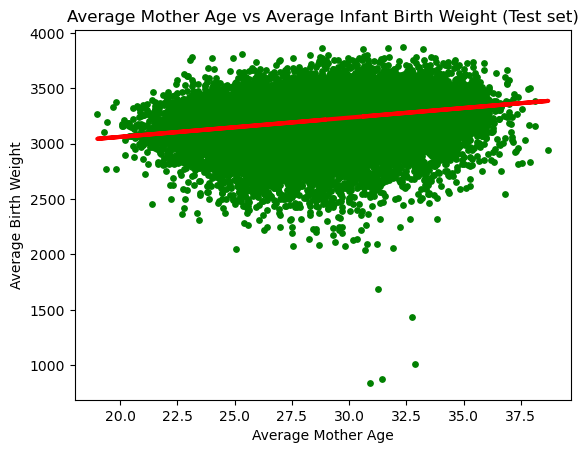

In [46]:
# Visualizing the training set results.

plot_test_2 = plt
plot_test_2.scatter(X_train, y_train, color='green', s = 15)
plot_test_2.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test_2.title('Average Mother Age vs Average Infant Birth Weight (Test set)')
plot_test_2.xlabel('Average Mother Age')
plot_test_2.ylabel('Average Birth Weight')
plot_test_2.show()

### 13. Thoughts on how well model performed on test set

#### There appears to be some relationship betwen mother age and infant birth weight; however, the relationship does not appear to be linear. Linear regression is likely not the ideal model needed for prediction.

In [52]:
# These FAILED. Redo with instruction.

# Exporting liner regression image files:

#plt.figure()
#tree.plot_tree(clf,filled=True)  
plot_test.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'regression_test.eps'), format='eps',bbox_inches = "tight")

<Figure size 640x480 with 0 Axes>

In [53]:
plot_test_2.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'regression_training.eps'), format='eps',bbox_inches = "tight")

<Figure size 640x480 with 0 Axes>